**Data source** : https://www.kaggle.com/loveall/clicks-conversion-tracking

**Reference** : https://www.kaggle.com/mansimeena/facebook-ad-campaigns-analysis-sales-prediction

**데이터 설명:**

이 프로젝트에서 사용하는 데이터는 익명화된 어떤 회사의 소셜 미디어(Facebook) 광고 집행 결과에 대한 데이터입니다.

각 데이터의 컬럼이 의미하는 바는 다음과 같습니다.

1. **ad_id** : 각각의 광고에 대한 고유한(unique)한 ID입니다.
2. **xyzcampaignid** : XYZ 회사에서 부여한 각 AD의 캠페인 ID
3. **fbcampaignid** : Facebook에서 부여한 각 AD의 캠페인 ID
4. **age** : 각 AD가 노출된 사용자의 나이
5. **gender** : 각 AD가 노출된 사용자의 성별
6. **interest** : 사용자의 Facebook 공개프로필에 기반해서 파악한 사용자의 관심사 code
7. **Impressions** : 광고가 노출된 횟수
8. **Clicks** : 광고가 클릭된 횟수
9. **Spent** : xyz가 해당 AD에 Facebook에 지출한 비용(paid)
10. **Total conversion** : 광고를 본 후에 제품에 문의를 준 사람의 수
11. **Approved conversion** : 광고를 본 후에 제품을 실제로 구매한 사람의 수

## 데이터 분석의 목표

- 전환율(Conversion) 분석
- 앞으로 광고 집행 action plan 제시


## 분석 방법론
- 광고 현황을 분석하고 정리한 후 조합하여 action 제시

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_csv("./KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
df['ad_id'].nunique()

1143

In [7]:
df['xyz_campaign_id'].nunique()

3

In [8]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

In [9]:
# 각 캠페인을 A,B,C로 이름 붙인다.
df["xyz_campaign_id"].replace({916:"campaignA",936:"campaignB",1178:"campaignC"}, inplace=True)

In [10]:
df['fb_campaign_id'].nunique()

691

<AxesSubplot:>

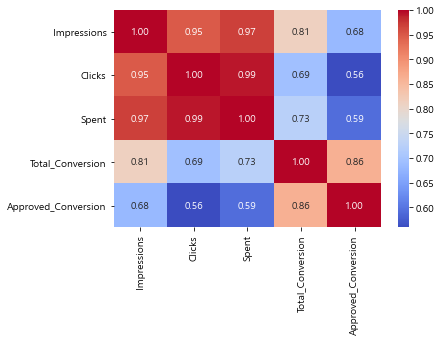

In [11]:
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
              annot = True,
              fmt = ".2f",
              cmap = "coolwarm")

- 구매 전환과 제품 문의 전환의 상관관계가 높음. 제품 문의까지 도달한다면 구매 전환이 이루어질 확률이 높음.

# 캠패인별 분석

In [12]:
df.groupby('xyz_campaign_id')[['Spent','Impressions','Clicks','Total_Conversion','Approved_Conversion']].sum()

,Spent,Impressions,Clicks,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,,,
campaignA,149.710001,482925,113,58,24
campaignB,2893.369999,8128187,1984,537,183
campaignC,55662.149959,204823716,36068,2669,872


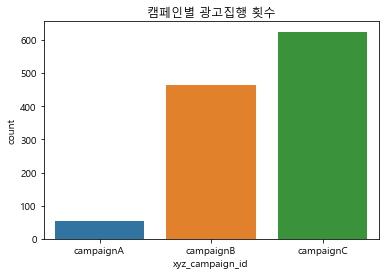

In [13]:
# 캠페인별 광고 집행 횟수
sns.countplot(data=df, x ='xyz_campaign_id')
plt.title('캠페인별 광고집행 횟수')
plt.show()

#### 캠페인A의 구매 전환당 비용

In [14]:
df[df['xyz_campaign_id']=='campaignA'][['Spent']].sum()

Spent    149.710001
dtype: float64

In [15]:
df[df['xyz_campaign_id']=='campaignA'][['Approved_Conversion']].sum()

Approved_Conversion    24
dtype: int64

In [16]:
df[df['xyz_campaign_id']=='campaignA'][['Spent']].sum()[0] / df[df['xyz_campaign_id']=='campaignA'][['Approved_Conversion']].sum()[0]

6.237916694041665

#### 캠페인B의 구매 전환당 비용

In [17]:
df[df['xyz_campaign_id']=='campaignB'][['Spent']].sum()[0] / df[df['xyz_campaign_id']=='campaignB'][['Approved_Conversion']].sum()[0]

15.810765021497264

#### 캠페인C의 구매 전환당 비용

In [18]:
df[df['xyz_campaign_id']=='campaignC'][['Spent']].sum()[0] / df[df['xyz_campaign_id']=='campaignC'][['Approved_Conversion']].sum()[0]

63.83274077822706

- 캠패인 A: 6.237916694041665
- 캠패인 B: 15.810765021497264
- 캠패인 C: 63.83274077822706

#### 캠패인 A가 비용 대비 효율이 가장 좋음. 그러나 가장 적은 광고 집행을 하고 있으므로 캠패인 A의 비중을 늘릴 필요가 있음

Text(0.5, 1.0, '캠페인별 평균 전환수')

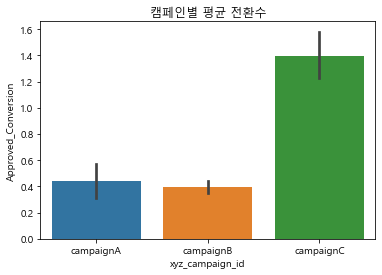

In [19]:
# 캠페인별 Approved_Conversion 평균 전환 수
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"])
plt.title("캠페인별 평균 전환수")

# 나이대별 분석

Text(0.5, 1.0, '나이대별 집행횟수')

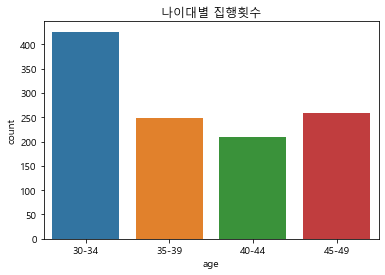

In [20]:
# 나이대별 광고 집행 횟수
sns.countplot(data=df, x ='age') 
plt.title('나이대별 집행횟수')

Text(0.5, 1.0, '나이대별 전환율')

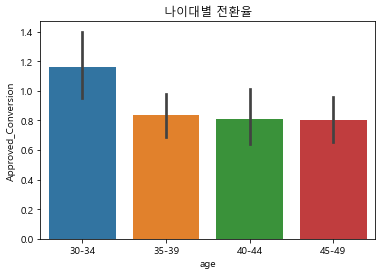

In [21]:
sns.barplot(x = df['age'], y = df['Approved_Conversion'])
plt.title('나이대별 전환율')

Text(0.5, 1.0, '나이대별 전환율')

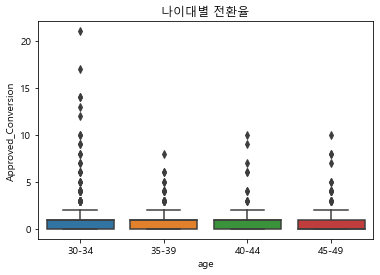

In [22]:
sns.boxplot(x = df['age'], y = df['Approved_Conversion'])
plt.title('나이대별 전환율')

- 40~44세를 대상으로 한 광고 집행이 적음. 의도하지 않았다면 집행을 늘릴 필요가 있음

Text(0.5, 1.0, '나이대별 집행횟수')

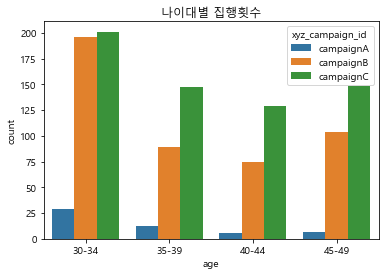

In [23]:
# 나이대별 캠패인별 집행 횟수
sns.countplot(data=df, x ='age',hue='xyz_campaign_id') 
plt.title('나이대별 집행횟수')

<AxesSubplot:xlabel='age', ylabel='Approved_Conversion'>

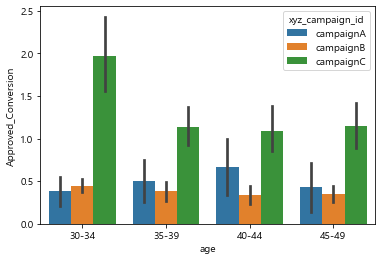

In [24]:
sns.barplot(data = df, x ="age", y = "Approved_Conversion", hue="xyz_campaign_id")

- 캠패인 B는 전반적으로 집행횟수 대비 전환이 적음
- 캠패인A는 40-44세에 매우 적은 광고 집행을 하는데 전환 수는 40-44세가 가장 높음. 따라서 40-44세에 더 많은 광고 집행 필요
- 즉, A는 30-34의 집행을 줄이고 40-44세에 집행을 늘려야 함

# 성별별 분석

<AxesSubplot:xlabel='gender', ylabel='count'>

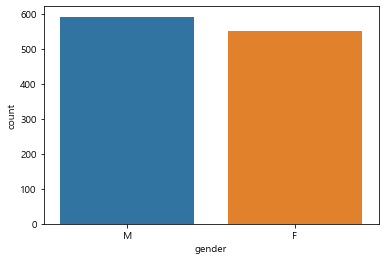

In [25]:
sns.countplot(data=df, x ='gender') 

<AxesSubplot:xlabel='gender', ylabel='Approved_Conversion'>

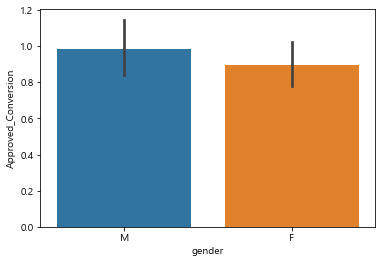

In [26]:
sns.barplot(data=df, x ='gender', y= 'Approved_Conversion') 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

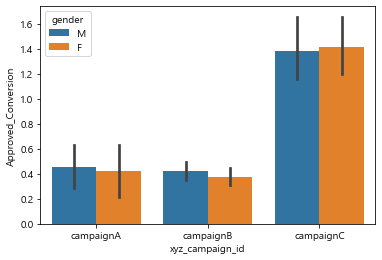

In [27]:
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue=df["gender"])

- 성별별로는 큰 차이가 없다.

# Interest(관심사)별 분석

<AxesSubplot:xlabel='interest', ylabel='count'>

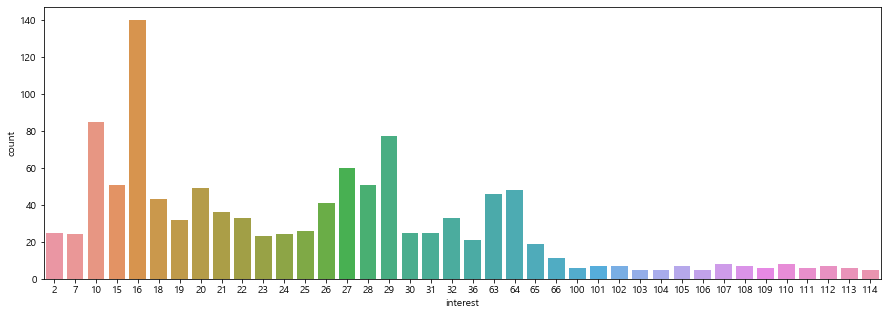

In [28]:
# 관심사별 광고 노출 횟수
plt.figure(figsize=(15,5))
sns.countplot(x ='interest', data = df) 

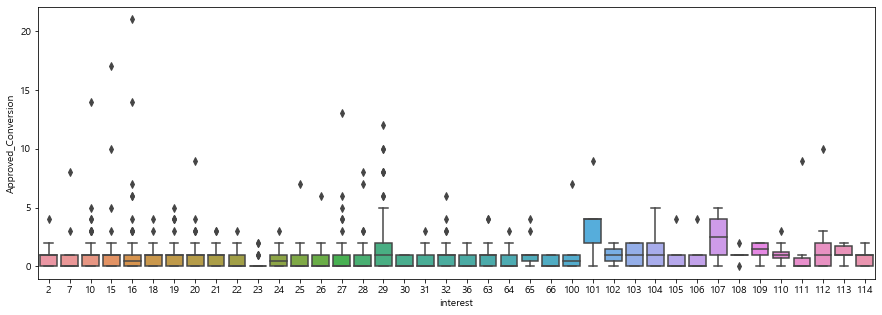

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['interest'], y=df['Approved_Conversion']);

- 101번 또는 107번 관심사를 대상으로 한 광고가 광고 노출 횟수에 비해 전환율이 높음

In [44]:
df.query('interest <= 100')['Approved_Conversion'].mean()

0.8946869070208728

In [45]:
df.query('interest > 100')['Approved_Conversion'].mean()

1.5280898876404494

- interst > 100 의 광고 노출횟수는 적지만 평균적인 Approved_Conversion은 더 높다

#### interest 100번대를 대상으로 광고 집행을 늘릴 필요가 있음

<AxesSubplot:xlabel='interest', ylabel='count'>

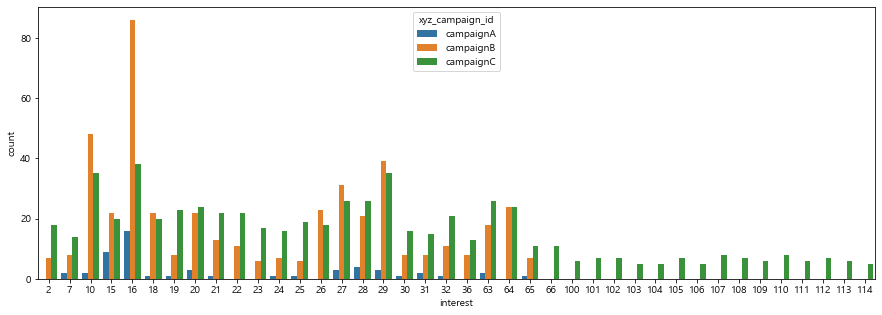

In [32]:
# 관심사별 광고 집행 횟수
plt.figure(figsize=(15,5))
sns.countplot(data = df, x ='interest', hue='xyz_campaign_id')

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

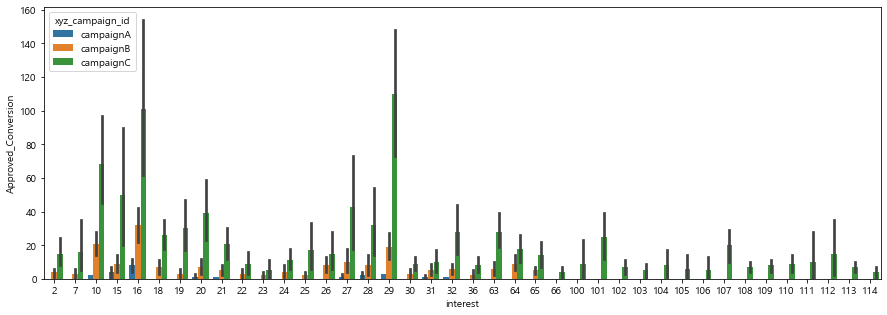

In [33]:
# 관심사별 구매 전환 횟수
plt.figure(figsize=(15,5))
sns.barplot(data = df, x ='interest', y='Approved_Conversion', hue='xyz_campaign_id', estimator=sum)

- 캠패인 C의 경우 interest 100번대를 대상으로 광고 집행을 늘릴 필요가 있음
- 캠패인 A, 캠패인 B의 경우 interest 100번대를 대상으로 광고 집행을 하고 있지 않으니, 시도해 볼 필요가 있음

# 광고비 지출 (Spent)

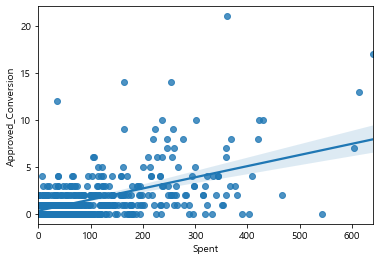

In [34]:
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

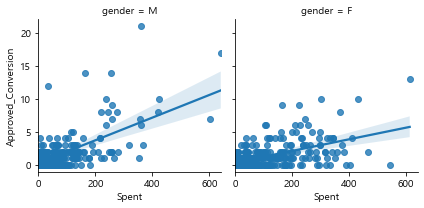

In [35]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.regplot, "Spent", "Approved_Conversion")

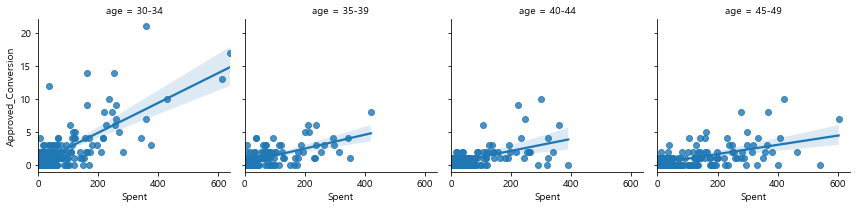

In [36]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Spent", "Approved_Conversion")

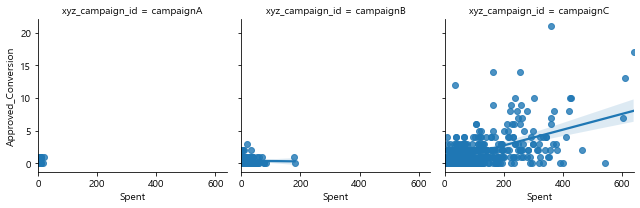

In [37]:
g = sns.FacetGrid(df, col="xyz_campaign_id")
g.map(sns.regplot, "Spent", "Approved_Conversion")

- 광고비와는 눈에 띄는 상과관계를 찾을 수 없음
- 30-34세가 비교적 양의 상관관계를 보인다.

# Impression (노출 수)

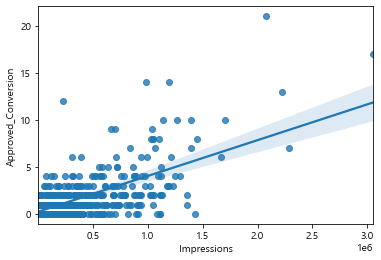

In [38]:
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

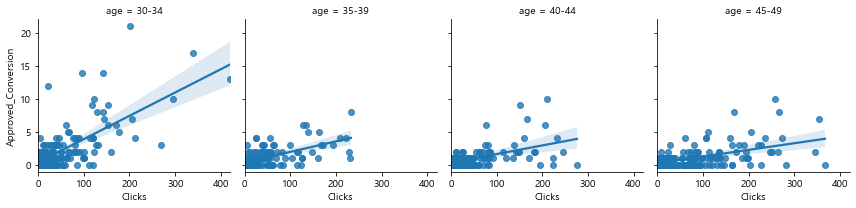

In [39]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Clicks", "Approved_Conversion")

- 30-34세가 비교적 양의 상관관계를 보인다.

# 제품 문의 전환

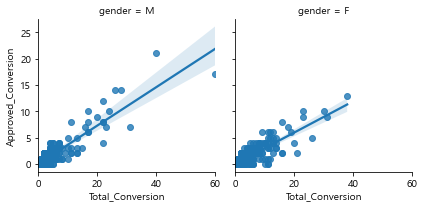

In [40]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.regplot, "Total_Conversion", "Approved_Conversion")

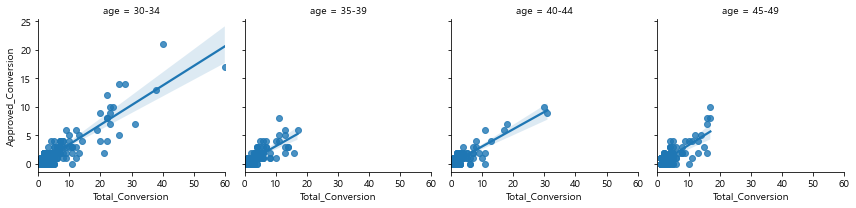

In [41]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Total_Conversion", "Approved_Conversion")

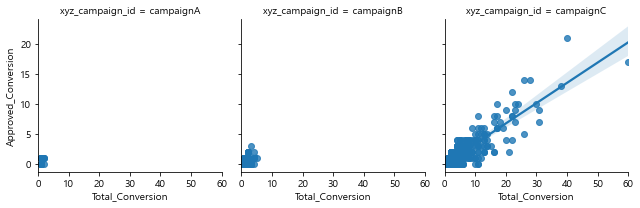

In [42]:
g = sns.FacetGrid(df, col="xyz_campaign_id")
g.map(sns.regplot, "Total_Conversion", "Approved_Conversion")

- 대부분 양의 상관관계를 보인다.

# 정리

- 캠패인 A가 비용 대비 효율이 가장 좋음. 그러나 가장 적은 광고 집행을 하고 있으므로 캠패인 A의 비중을 늘릴 필요가 있음
- 40~44세를 대상으로 한 광고 집행이 적음. 의도하지 않았다면 집행을 늘릴 필요가 있음
- 캠패인 B는 전반적으로 집행횟수 대비 전환이 적음 (가장 비효율적)
- 캠패인 A는 40-44세에 매우 적은 광고 집행을 하는데 전환 수는 40-44세가 가장 높음 따라서 40-44세에 더 많은 광고 집행 필요
- 즉, A는 30-34의 집행을 줄이고 40-44세에 집행을 늘려야 함
- 101번 또는 107번 관심사를 대상으로 한 광고가 광고 노출 횟수에 비해 전환율이 높음
- 101번 이상의 관심사들의 광고 노출횟수는 적지만 평균적인 Approved_Conversion은 더 높다 (평균 전환 횟수 각 0.89, 1.53)
- 캠패인 C의 경우 interest 100번대를 대상으로 광고 집행 횟수 대비 전환이 높음. 광고 집행을 늘릴 필요가 있음.
- 캠패인 A, 캠패인 B의 경우 interest 100번대를 대상으로 광고 집행을 하고 있지 않으니, 시도해 볼 필요가 있음

# Action Plan

투비컨티뉴...